# [치매 고위험군 웨어러블 라이프로그](https://aihub.or.kr/node/30749)

|NO|항목(영문)|항목(한글)|타입|
|:-:|:-:|:-:|:-:|
|1|email|이메일|varchar(200)|
|2|date|요약 날짜|varchar(10)|
|3|activity_average_met|하루간 평균 MET|varchar(10)|
|4|activity_cal_active|하루간 활동 칼로리|varchar(10)|
|5|activity_cal_total|하루간 총 사용 칼로리|varchar(10)|
|6|activity_daily_movement|매일 움직인 거리|varchar(10)|
|7|activity_high|고강도 활동 시간|varchar(10)|
|8|activity_inactive|비활동 시간|varchar(10)|
|9|activity_inactivity_alerts|비활동 알람 횟수|varchar(10)|
|10|active_low|저강도 활동 시간|varchar(10)|
|11|activity_medium|중강도 활동 시간|varchar(10)|
|12|activity_met_min_high|하루간 고강도 활동 MET|varchar(10)|
|13|activity_met_min_inactive|하루간 비활동 MET|varchar(10)|
|14|activity_met_min_low|하루간 저강도 활동 MET|varchar(10)|
|15|activity_met_min_medium|하루간 중강도 활동 MET|varchar(10)|
|16|activity_non_wear|미착용 시간|varchar(10)|
|17|activity_rest|휴식 시간|varchar(10)|
|18|activity_score|활동 점수|varchar(10)|
|19|activity_score_meet_daily_targets|활동 목표달성 점수|varchar(10)|
|20|activity_score_move_every_hour|매 시간 당 활동유지 점수|varchar(10)|
|21|activity_score_recovery_time|회복시간 점수|varchar(10)|
|22|activity_score_stay_active|활동 유지 점수|varchar(10)|
|23|activity_score_training_frequency|운동 빈도 점수|varchar(10)|
|24|activity_score_training_volume|운동 빈도 점수|varchar(10)|
|25|activity_steps|매일 걸음 수|varchar(10)|
|26|activity_total|활동 총 시간(분)|varchar(10)|
|27|sleep_awake|깬 시간|varchar(10)|
|28|sleep_breath_average|분단 평균 호흡 수|varchar(10)|
|29|sleep_deep|깊은 수면 시간|varchar(10)|
|30|sleep_duration|잠 시간|varchar(10)|
|31|sleep_efficiency|수면 효율|varchar(10)|
|32|sleep_hr_average|분당 평균 심박동 수|varchar(10)|
|33|sleep_hr_lowest|분당 낮은 심박동 수|varchar(10)|
|34|sleep_is_longest|본 수면 여부|varchar(10)|
|35|sleep_light|가벼운 수면 시간|varchar(10)|
|36|sleep_midpoint_at_delta|수면 중간점 시간 델타|varchar(10)|
|37|sleep_midpoint_time|수면 중간점 시간|varchar(10)|
|38|sleep_onset_latency|수면 잠복 시간|varchar(10)|
|39|sleep_period_id|수면 식별 아이디|varchar(10)|
|40|sleep_rem|램수면 시간|varchar(10)|
|41|sleep_restless|뒤척임 비율|varchar(10)|
|42|sleep_rmssd|평균 심박동변동|varchar(10)|
|43|sleep_score|수면 종합 점수|varchar(10)|
|44|sleep_score_alignment|수면 시기 점수|varchar(10)|
|45|sleep_score_deep|깊은 수면 점수|varchar(10)|
|46|sleep_score_disturbances|수면 방해 점수|varchar(10)|
|47|sleep_score_efficiency|수면 효율 점수|varchar(10)|
|48|sleep_score_latency|수면 잠복 점수|varchar(10)|
|49|sleep_score_rem|램수면 점수|varchar(10)|
|50|sleep_score_total|수면 시간 기여 점수|varchar(10)|
|51|sleep_temperature_delta|피부 온도 편차|varchar(10)|
|52|sleep_temperature_deviation|피부 온도 편차|varchar(10)|
|53|sleep_temperature_trend_deviation|피부 온도 경향 편차|varchar(10)|

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv('data/train/train.csv')
train_label = pd.read_csv('data/train/train_label.csv')
test_df = pd.read_csv('data/test/test.csv')
test_label = pd.read_csv('data/test/sample_submission.csv')
train_df.shape, train_label.shape, test_df.shape, test_label.shape

((9327, 65), (148, 2), (29092, 65), (471, 2))

In [ ]:
df = pd.read_csv('data/train/train.csv')
df.head()

,EMAIL,summary_date,activity_average_met,activity_cal_active,activity_cal_total,activity_class_5min,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,...,sleep_temperature_delta,sleep_temperature_deviation,sleep_temperature_trend_deviation,timezone,sleep_total,CONVERT(activity_class_5min USING utf8),CONVERT(activity_met_1min USING utf8),CONVERT(sleep_hr_5min USING utf8),CONVERT(sleep_hypnogram_5min USING utf8),CONVERT(sleep_rmssd_5min USING utf8)
0,nia+404@rowan.kr,2020-11-27,1.71875,730,2944,...,14346,0,417,0,...,-0.12,-0.12,99.99,NaN,\r,2/1/1/1/1/1/2/2/1/1/1/1/1/1/2/2/2/3/2/2/2/2/2/...,0.9/0.9/1.4/1.9/1.1/0.9/0.9/1.1/1.3/1/0.9/1.1/...,0/73/73/73/72/71/70/71/71/71/70/70/73/72/74/74...,4/2/4/3/3/1/2/2/2/2/2/2/3/3/3/4/4/3/2/2/2/2/2/...,0/10/10/10/11/11/10/12/18/13/14/12/10/10/18/17...
1,nia+404@rowan.kr,2020-11-28,1.40625,342,2449,...,6352,0,473,0,...,-0.32,-0.32,99.99,NaN,\r,1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/2/2/2/2/2/...,1.2/1.1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....,69/70/69/69/70/72/71/72/70/69/69/69/68/68/63/6...,2/4/2/2/2/2/3/1/2/2/4/4/2/2/2/2/2/2/2/2/2/2/4/...,23/23/26/24/18/13/15/14/17/20/24/30/23/25/22/1...
2,nia+404@rowan.kr,2020-11-29,1.46875,401,2544,...,7297,0,586,0,...,0.07,0.07,99.99,NaN,\r,1/1/1/1/1/1/1/2/1/1/1/1/2/2/2/2/2/1/1/1/1/1/2/...,1.1/1.1/1.2/1.1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....,0/74/73/73/74/74/74/71/71/70/70/69/70/68/66/69...,4/2/4/4/1/1/1/4/4/4/4/4/4/4/2/3/4/2/2/4/2/2/2/...,0/11/14/20/13/14/14/16/27/29/27/20/19/19/14/12...
3,nia+404@rowan.kr,2020-11-30,0.34375,27,1850,...,491,0,176,0,...,-0.41,-0.41,99.99,NaN,\r,2/1/2/2/1/2/1/1/2/1/1/1/1/1/2/1/1/1/1/1/2/2/2/...,0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/...,73/70/71/72/75/75/73/70/70/70/67/63/63/63/63/6...,4/4/4/4/3/3/3/2/4/4/4/2/2/2/2/2/2/2/2/4/2/2/2/...,24/28/19/17/12/10/17/20/23/23/25/31/26/25/34/3...
4,nia+404@rowan.kr,2020-12-01,1.46875,333,2518,...,5861,0,646,0,...,-0.27,-0.27,99.99,NaN,\r,1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/2/3/3/2/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....,0/0/0/0/0/0/0/0/69/69/71/69/65/66/64/64/65/66/...,4/4/4/4/4/4/4/4/4/4/4/2/2/2/2/3/3/2/4/4/4/2/2/...,0/0/0/0/0/0/0/0/21/22/26/23/19/29/22/17/14/13/...


In [ ]:
label = pd.read_csv('data/train/train_label.csv')
label.head()

,SAMPLE_EMAIL,DIAG_NM
0,nia+315@rowan.kr,CN
1,nia+220@rowan.kr,CN
2,nia+096@rowan.kr,MCI
3,nia+163@rowan.kr,CN
4,nia+396@rowan.kr,CN


In [ ]:
print(len(df.EMAIL))
print(len(df.EMAIL.drop_duplicates()))

9327
148


In [ ]:
from datetime import datetime
df.summary_date = df.summary_date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
df.drop(['activity_class_5min','activity_met_1min','sleep_hr_5min','sleep_hypnogram_5min','sleep_rmssd_5min'],axis=1,inplace=True)
df.drop(['CONVERT(activity_class_5min USING utf8)','CONVERT(activity_met_1min USING utf8)','CONVERT(sleep_hr_5min USING utf8)','CONVERT(sleep_hypnogram_5min USING utf8)','CONVERT(sleep_rmssd_5min USING utf8)'],axis=1,inplace=True)
df.drop(['timezone','sleep_total'],axis=1,inplace=True)
df.head()

,EMAIL,summary_date,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,...,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_temperature_trend_deviation
0,nia+404@rowan.kr,2020-11-27,1.71875,730,2944,14346,0,417,0,545,...,100,41,50,27,97,66,62,-0.12,-0.12,99.99
1,nia+404@rowan.kr,2020-11-28,1.40625,342,2449,6352,0,473,0,392,...,100,49,43,46,91,35,44,-0.32,-0.32,99.99
2,nia+404@rowan.kr,2020-11-29,1.46875,401,2544,7297,0,586,0,362,...,100,56,47,34,89,41,62,0.07,0.07,99.99
3,nia+404@rowan.kr,2020-11-30,0.34375,27,1850,491,0,176,0,34,...,100,35,40,44,86,29,56,-0.41,-0.41,99.99
4,nia+404@rowan.kr,2020-12-01,1.46875,333,2518,5861,0,646,0,377,...,100,64,55,39,14,54,59,-0.27,-0.27,99.99


In [ ]:
rename_dict = {'summary_date':'요약 날짜','activity_average_met':'하루간 평균 MET','activity_cal_active':'하루간 활동 칼로리','activity_cal_total':'하루간 총 사용 칼로리','activity_daily_movement':'매일 움직인 거리','activity_high':'고강도 활동 시간','activity_inactive':'비활동 시간','activity_inactivity_alerts':'비활동 알람 횟수','activity_low':'저강도 활동 시간','activity_medium':'중강도 활동 시간','activity_met_min_high':'하루간 고강도 활동 MET','activity_met_min_inactive':'하루간 비활동 MET','activity_met_min_low':'하루간 저강도 활동 MET','activity_met_min_medium':'하루간 중강도 활동 MET','activity_non_wear':'미착용 시간','activity_rest':'휴식 시간','activity_score':'활동 점수','activity_score_meet_daily_targets':'활동 목표달성 점수','activity_score_move_every_hour':'매 시간 당 활동유지 점수','activity_score_recovery_time':'회복시간 점수','activity_score_stay_active':'활동 유지 점수','activity_score_training_frequency':'운동 빈도 점수','activity_score_training_volume':'운동 볼륨 점수','activity_steps':'매일 걸음 수','activity_total':'활동 총 시간(분','sleep_awake':'깬 시간','sleep_breath_average':'분단 평균 호흡 수','sleep_deep':'깊은 수면 시간','sleep_duration':'잠 시간','sleep_efficiency':'수면 효율','sleep_hr_average':'분당 평균 심박동 수','sleep_hr_lowest':'분당 낮은 심박동 수','sleep_is_longest':'본 수면 여부','sleep_light':'가벼운 수면 시간','sleep_midpoint_at_delta':'수면 중간점 시간 델타','sleep_midpoint_time':'수면 중간점 시간','sleep_onset_latency':'수면 잠복 시간','sleep_period_id':'수면 식별 아이디','sleep_rem':'램수면 시간','sleep_restless':'뒤척임 비율','sleep_rmssd':'평균 심박동변동','sleep_score':'수면 종합 점수','sleep_score_alignment':'수면 시기 점수','sleep_score_deep':'깊은 수면 점수','sleep_score_disturbances':'수면 방해 점수','sleep_score_efficiency':'수면 효율 점수','sleep_score_latency':'수면 잠복 점수','sleep_score_rem':'램수면 점수','sleep_score_total':'수면 시간 기여 점수','sleep_temperature_delta':'피부 온도 편차','sleep_temperature_deviation':'피부 온도 편차','sleep_temperature_trend_deviation':'피부 온도 경향 편차',}
en_df = df.copy()
kr_df = df.rename(rename_dict,axis=1)
kr_df.head()

,EMAIL,요약 날짜,하루간 평균 MET,하루간 활동 칼로리,하루간 총 사용 칼로리,매일 움직인 거리,고강도 활동 시간,비활동 시간,비활동 알람 횟수,저강도 활동 시간,...,수면 시기 점수,깊은 수면 점수,수면 방해 점수,수면 효율 점수,수면 잠복 점수,램수면 점수,수면 시간 기여 점수,피부 온도 편차,피부 온도 편차,피부 온도 경향 편차
0,nia+404@rowan.kr,2020-11-27,1.71875,730,2944,14346,0,417,0,545,...,100,41,50,27,97,66,62,-0.12,-0.12,99.99
1,nia+404@rowan.kr,2020-11-28,1.40625,342,2449,6352,0,473,0,392,...,100,49,43,46,91,35,44,-0.32,-0.32,99.99
2,nia+404@rowan.kr,2020-11-29,1.46875,401,2544,7297,0,586,0,362,...,100,56,47,34,89,41,62,0.07,0.07,99.99
3,nia+404@rowan.kr,2020-11-30,0.34375,27,1850,491,0,176,0,34,...,100,35,40,44,86,29,56,-0.41,-0.41,99.99
4,nia+404@rowan.kr,2020-12-01,1.46875,333,2518,5861,0,646,0,377,...,100,64,55,39,14,54,59,-0.27,-0.27,99.99


In [ ]:
date_dict = list()
for email in df.EMAIL.drop_duplicates():
    datetime_list = df[df.EMAIL == email].summary_date.tolist()
    date_list = df[df.EMAIL == email].summary_date.apply(lambda x: x.strftime("%y-%m-%d")).tolist()
    delta = (max(datetime_list) - min(datetime_list)).days
    date_dict.append({'email':email,'start':min(date_list),'end':max(date_list), 'len':len(date_list), 'delta':delta, 'compare':len(date_list)==delta})
pd.DataFrame(date_dict)

,email,start,end,len,delta,compare
0,nia+404@rowan.kr,20-11-27,21-01-19,43,53,False
1,nia+279@rowan.kr,20-10-19,20-12-22,63,64,False
2,nia+245@rowan.kr,20-10-20,20-12-22,63,63,True
3,nia+354@rowan.kr,20-10-30,20-12-30,56,61,False
4,nia+088@rowan.kr,20-10-21,21-01-06,41,77,False
...,...,...,...,...,...,...
143,nia+240@rowan.kr,20-11-07,21-01-04,50,58,False
144,nia+234@rowan.kr,20-10-29,21-01-19,64,82,False
145,nia+397@rowan.kr,20-11-26,21-01-03,36,38,False
146,nia+280@rowan.kr,20-10-18,21-01-19,73,93,False


In [ ]:
nia404 = kr_df[df.EMAIL == 'nia+404@rowan.kr'].copy()
nia404.drop(['EMAIL'],axis=1,inplace=True)
nia404['요약 날짜'] = nia404['요약 날짜'].apply(lambda x: x.strftime('%m%d'))
nia404.head()

,요약 날짜,하루간 평균 MET,하루간 활동 칼로리,하루간 총 사용 칼로리,매일 움직인 거리,고강도 활동 시간,비활동 시간,비활동 알람 횟수,저강도 활동 시간,중강도 활동 시간,...,수면 시기 점수,깊은 수면 점수,수면 방해 점수,수면 효율 점수,수면 잠복 점수,램수면 점수,수면 시간 기여 점수,피부 온도 편차,피부 온도 편차,피부 온도 경향 편차
0,1127,1.71875,730,2944,14346,0,417,0,545,47,...,100,41,50,27,97,66,62,-0.12,-0.12,99.99
1,1128,1.40625,342,2449,6352,0,473,0,392,8,...,100,49,43,46,91,35,44,-0.32,-0.32,99.99
2,1129,1.46875,401,2544,7297,0,586,0,362,24,...,100,56,47,34,89,41,62,0.07,0.07,99.99
3,1130,0.34375,27,1850,491,0,176,0,34,1,...,100,35,40,44,86,29,56,-0.41,-0.41,99.99
4,1201,1.46875,333,2518,5861,0,646,0,377,6,...,100,64,55,39,14,54,59,-0.27,-0.27,99.99


In [ ]:
act_df = {'nia404':dict()}
act_cols = ['활동 점수', '활동 목표달성 점수', '매 시간 당 활동유지 점수', '회복시간 점수', '활동 유지 점수', '운동 빈도 점수', '운동 볼륨 점수']
for col in act_cols:
    act_df['nia404'][col] = nia404[col].mean().round(2)
pd.DataFrame(act_df).T

,매 시간 당 활동유지 점수,운동 볼륨 점수,운동 빈도 점수,활동 목표달성 점수,활동 유지 점수,활동 점수,회복시간 점수
nia404,97.16,68.47,42.58,73.09,68.95,77.56,99.7


In [ ]:
nia404.head()

,요약 날짜,하루간 평균 MET,하루간 활동 칼로리,하루간 총 사용 칼로리,매일 움직인 거리,고강도 활동 시간,비활동 시간,비활동 알람 횟수,저강도 활동 시간,중강도 활동 시간,...,수면 시기 점수,깊은 수면 점수,수면 방해 점수,수면 효율 점수,수면 잠복 점수,램수면 점수,수면 시간 기여 점수,피부 온도 편차,피부 온도 편차,피부 온도 경향 편차
0,1127,1.71875,730,2944,14346,0,417,0,545,47,...,100,41,50,27,97,66,62,-0.12,-0.12,99.99
1,1128,1.40625,342,2449,6352,0,473,0,392,8,...,100,49,43,46,91,35,44,-0.32,-0.32,99.99
2,1129,1.46875,401,2544,7297,0,586,0,362,24,...,100,56,47,34,89,41,62,0.07,0.07,99.99
3,1130,0.34375,27,1850,491,0,176,0,34,1,...,100,35,40,44,86,29,56,-0.41,-0.41,99.99
4,1201,1.46875,333,2518,5861,0,646,0,377,6,...,100,64,55,39,14,54,59,-0.27,-0.27,99.99


In [ ]:
import plotly.express as px

labels = ['활동 점수', '활동 목표달성 점수', '활동 유지 점수', '운동 빈도 점수', '운동 볼륨 점수']
values = [nia404[label].mean().round(2) for label in labels]
active_df = pd.DataFrame(dict(theta=labels,r=values))
active_score_chart = px.line_polar(active_df, r='r', theta='theta', line_close=True)
active_score_chart.show()

In [ ]:
import plotly.express as px

labels = ['수면 시기 점수', '깊은 수면 점수', '수면 방해 점수', '수면 효율 점수', '수면 잠복 점수', '램수면 점수', '수면 시간 기여 점수']
values = [nia404[label].mean().round(2) for label in labels]
sleep_df = pd.DataFrame(dict(theta=labels,r=values))
sleep_score_chart = px.line_polar(sleep_df, r='r', theta='theta', line_close=True)
sleep_score_chart.show()

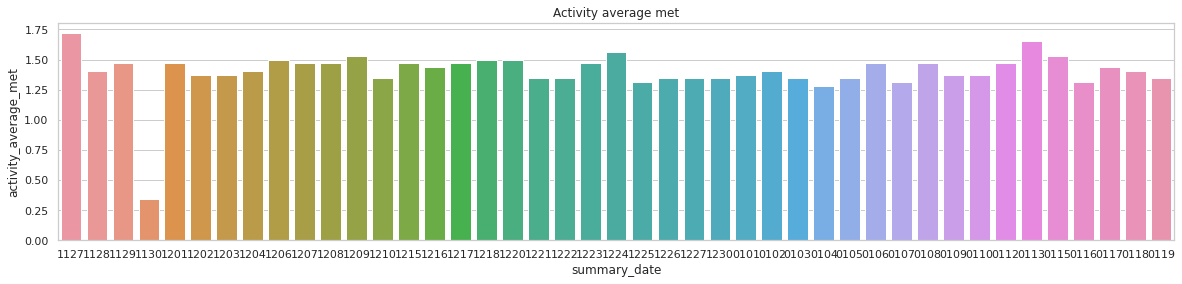

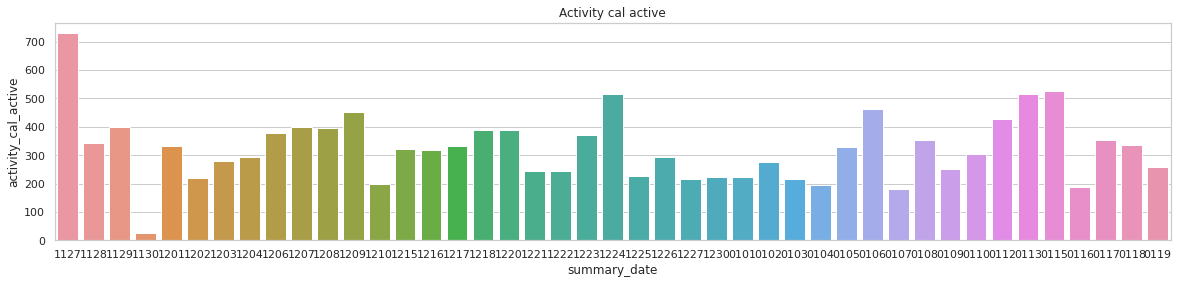

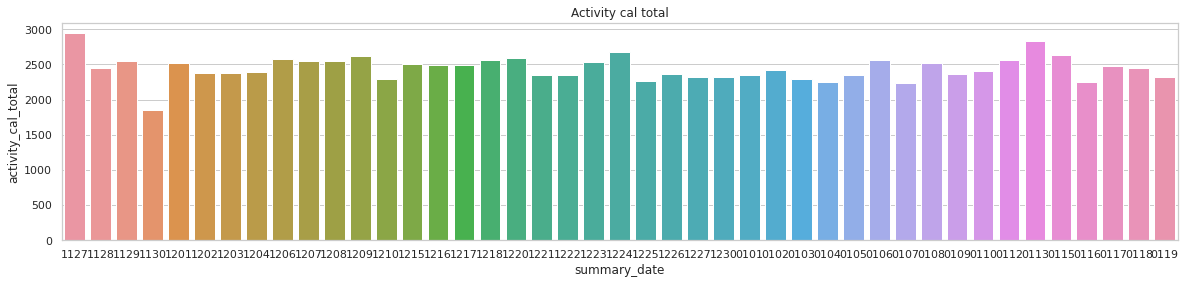

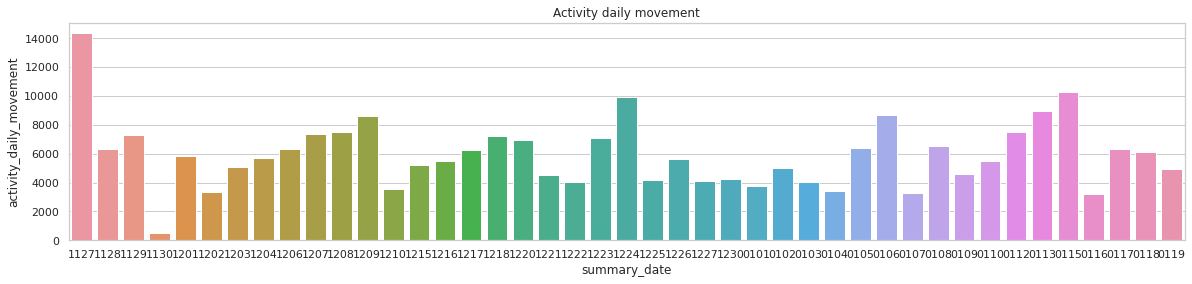

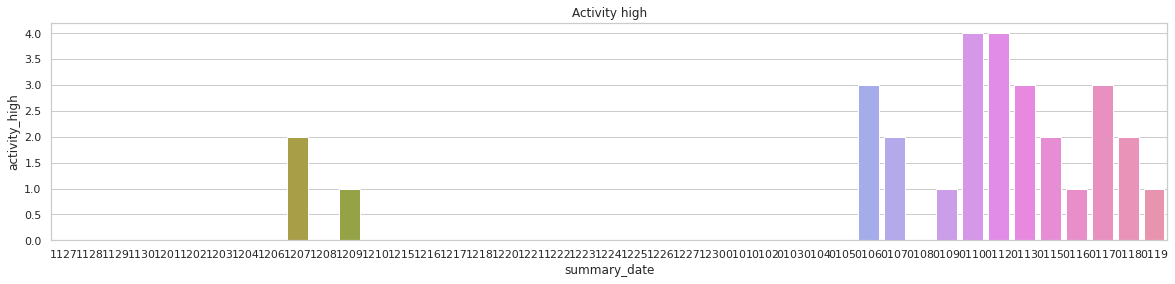

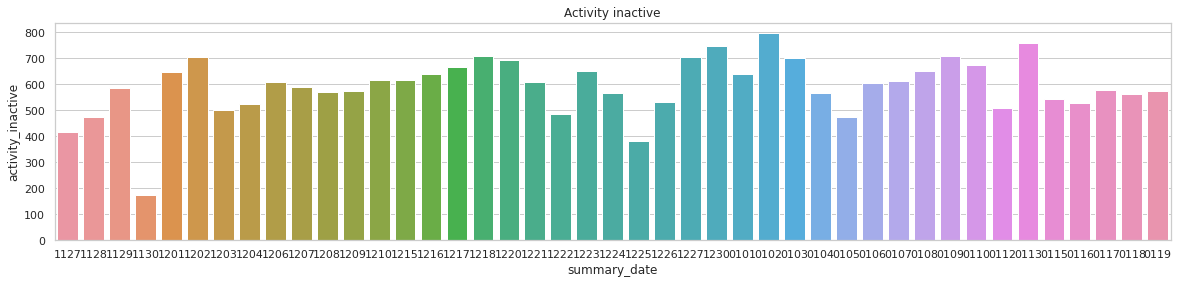

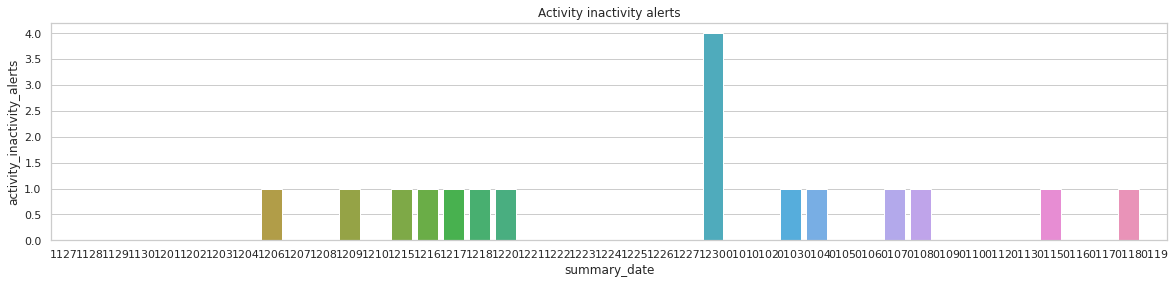

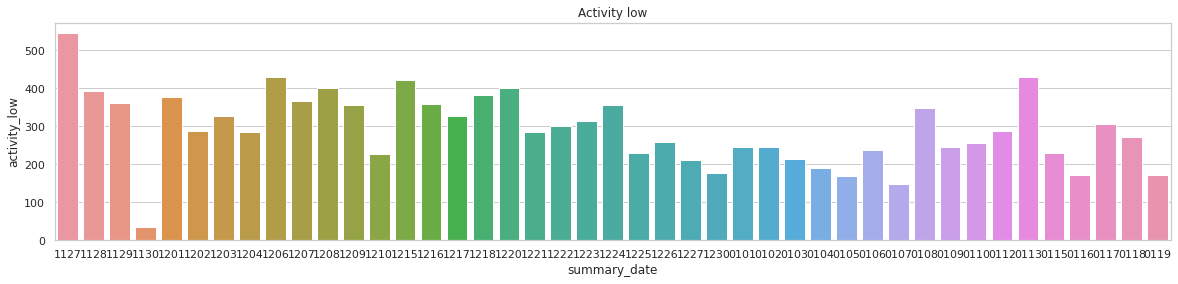

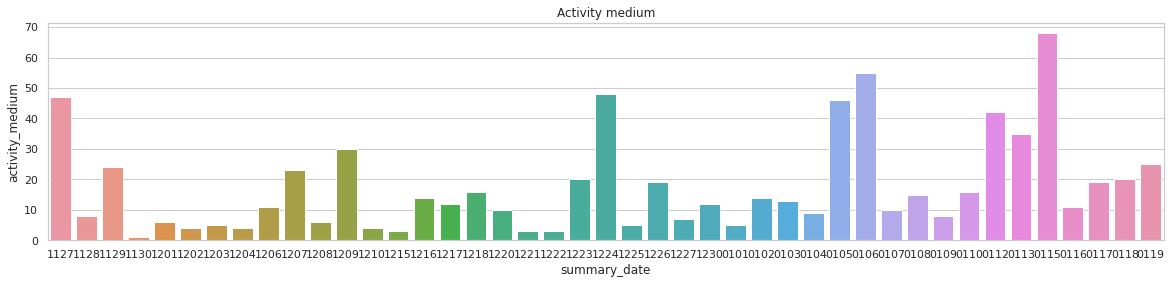

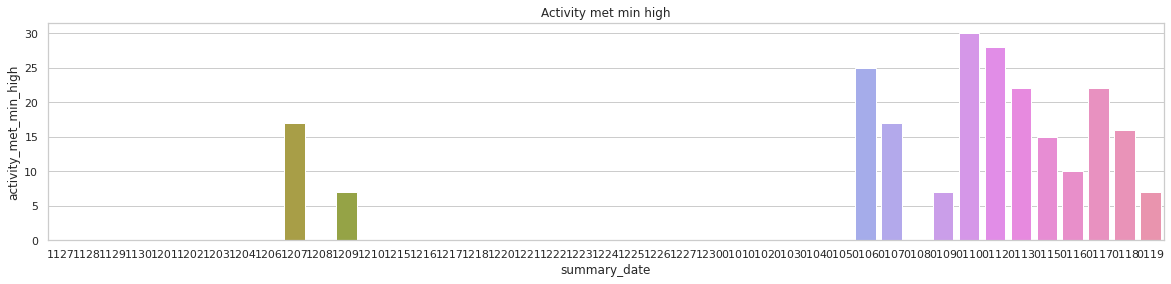

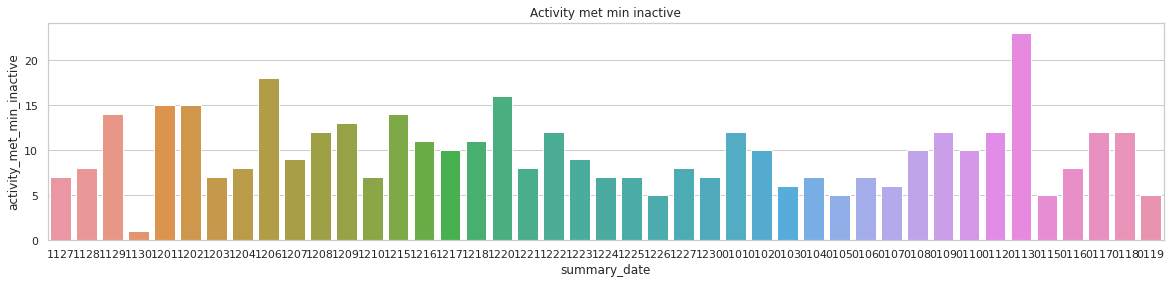

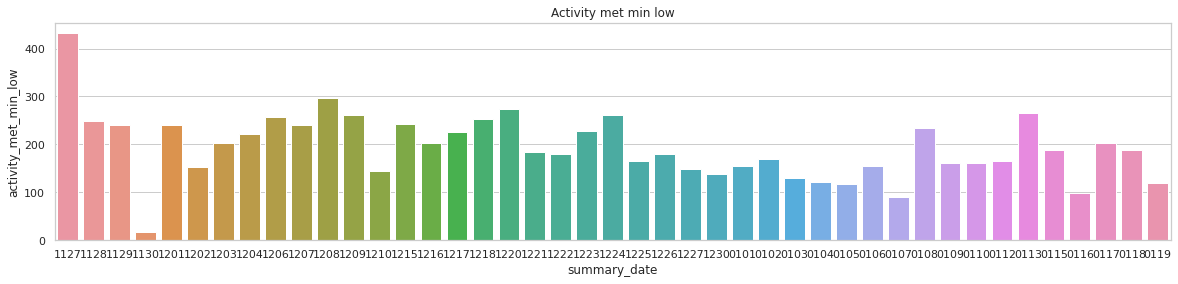

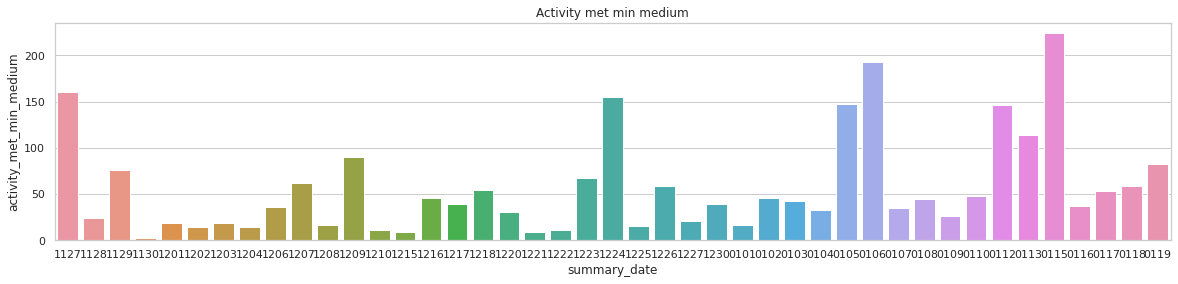

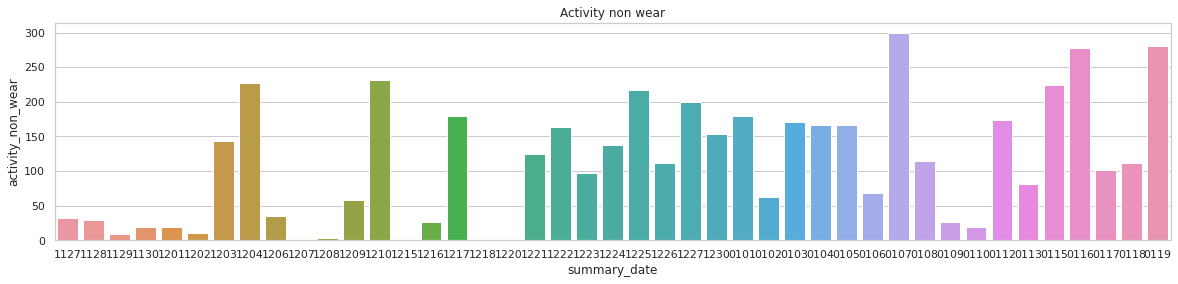

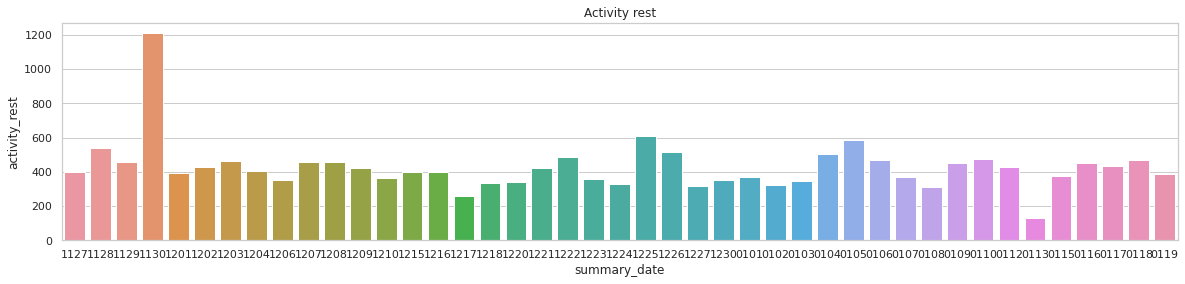

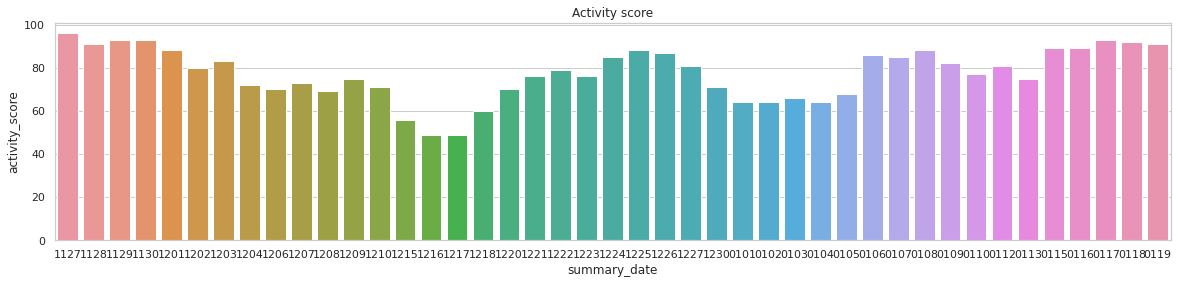

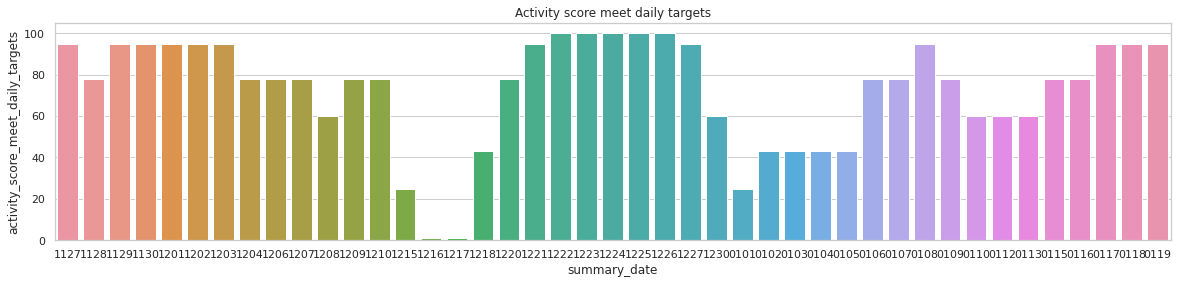

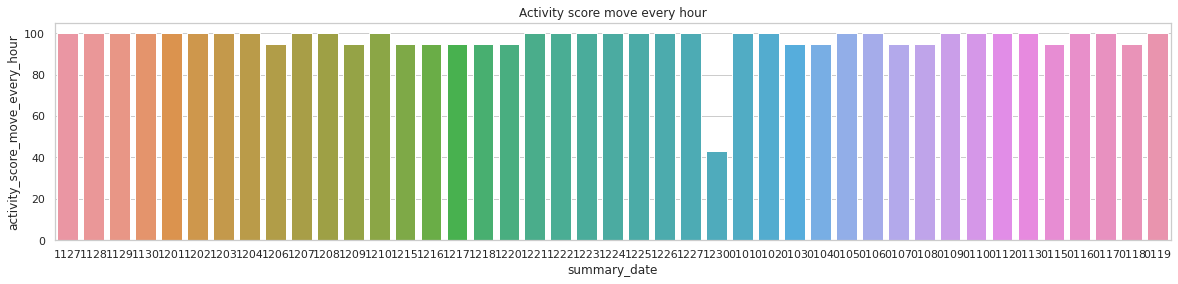

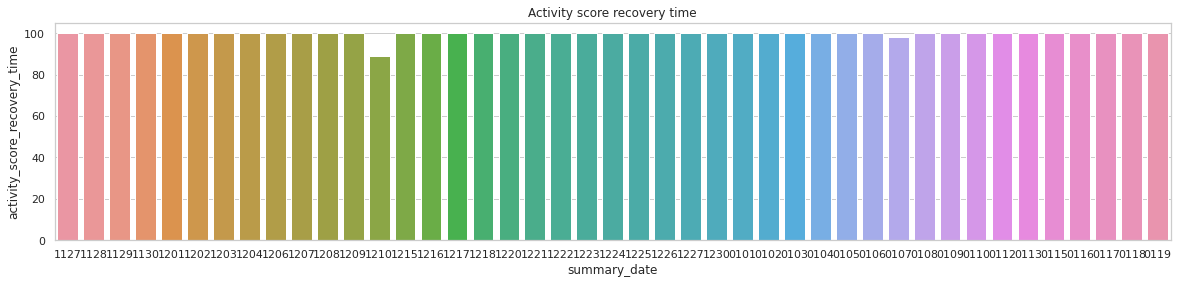

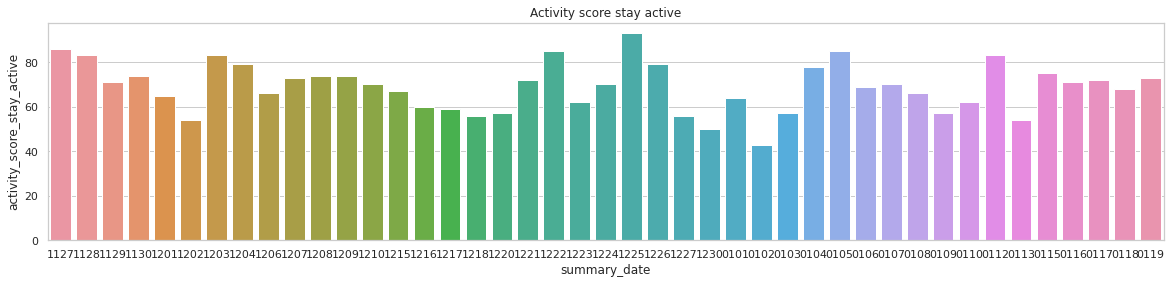

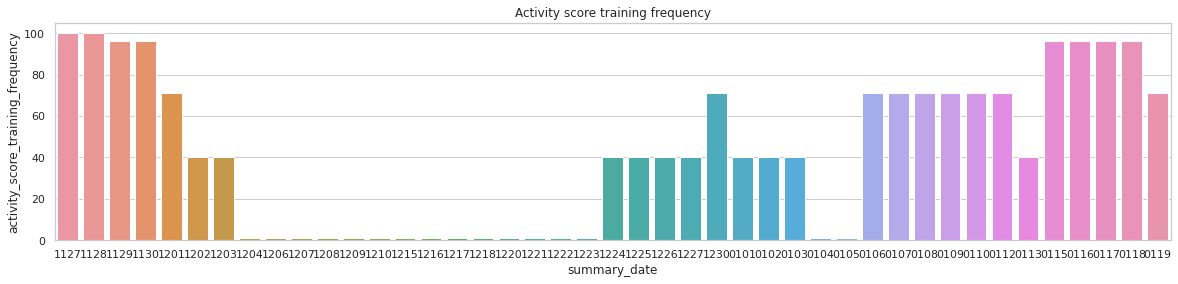

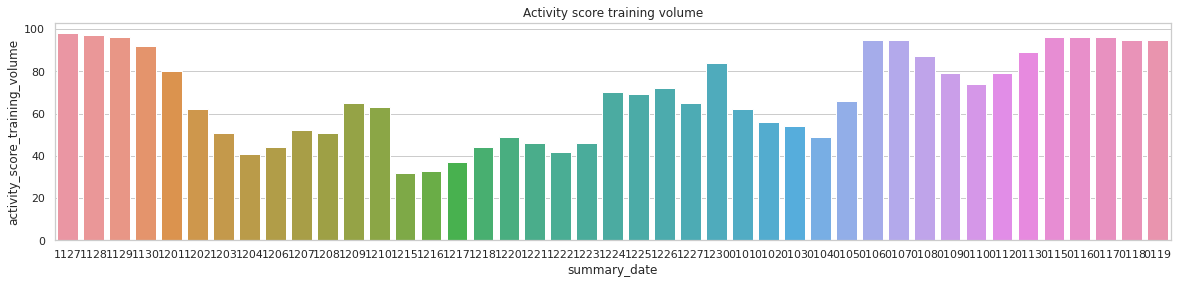

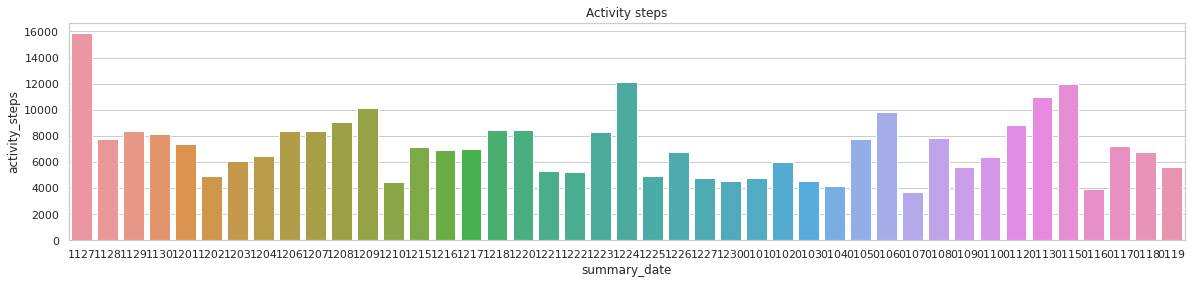

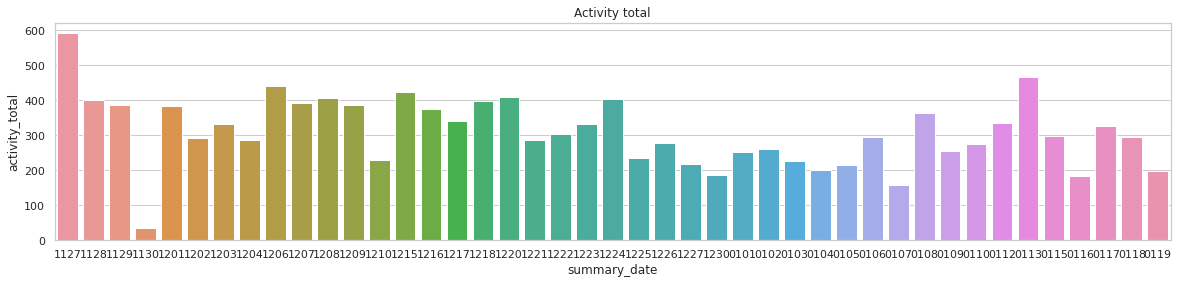

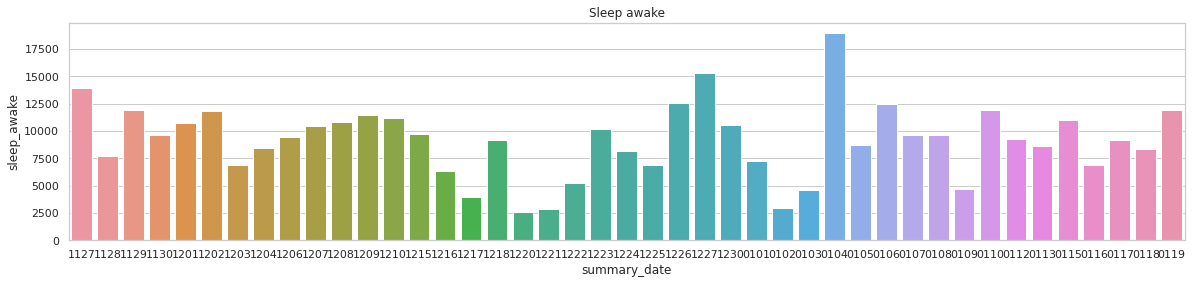

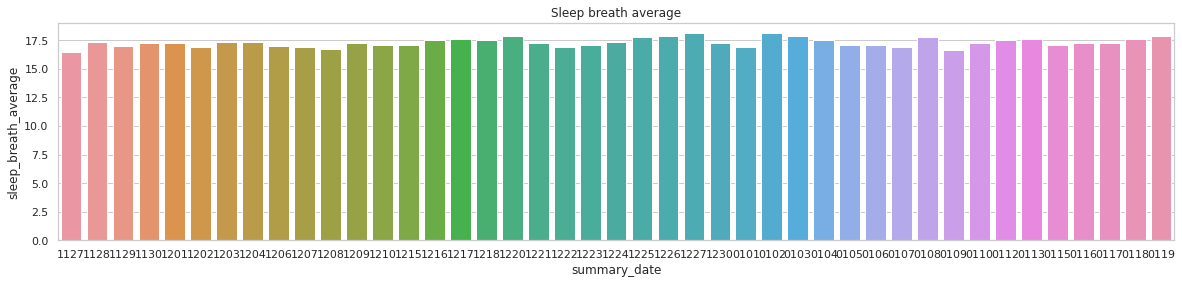

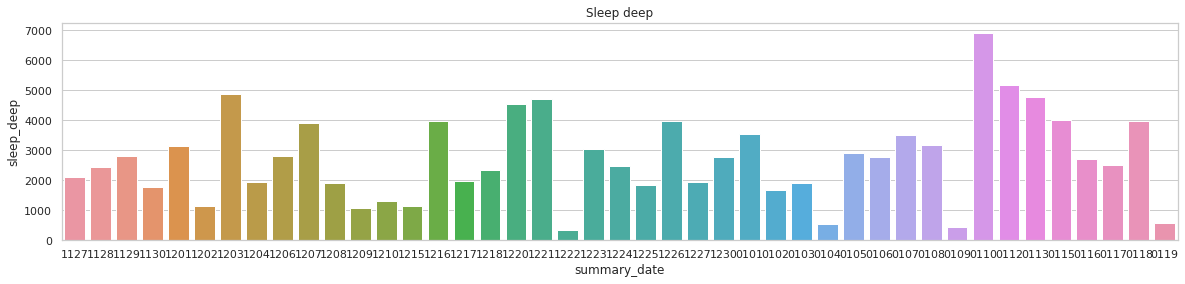

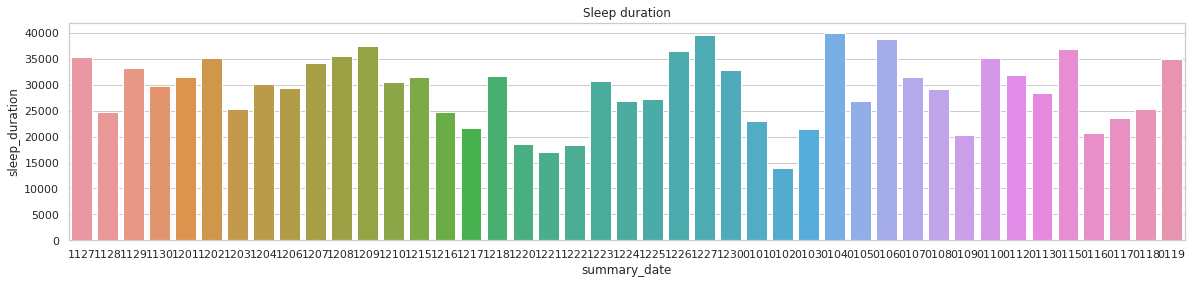

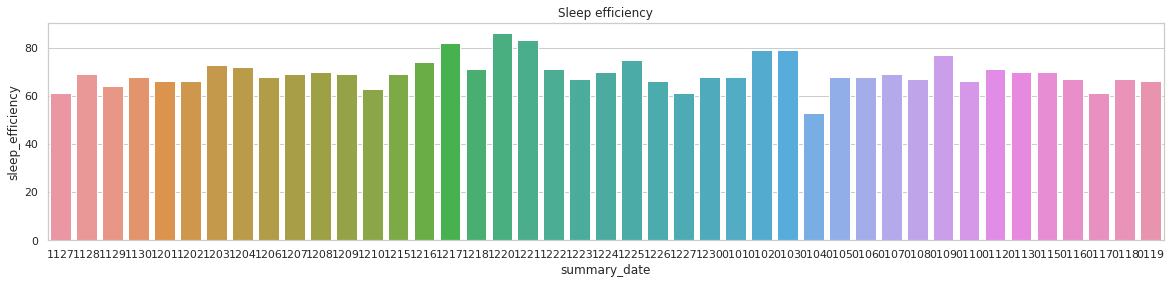

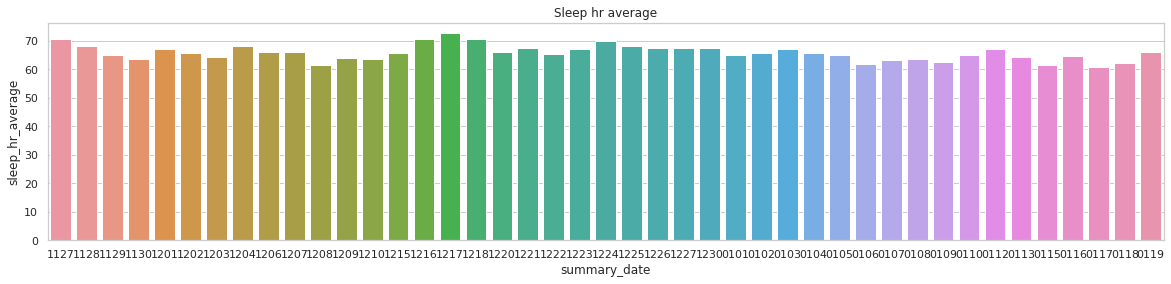

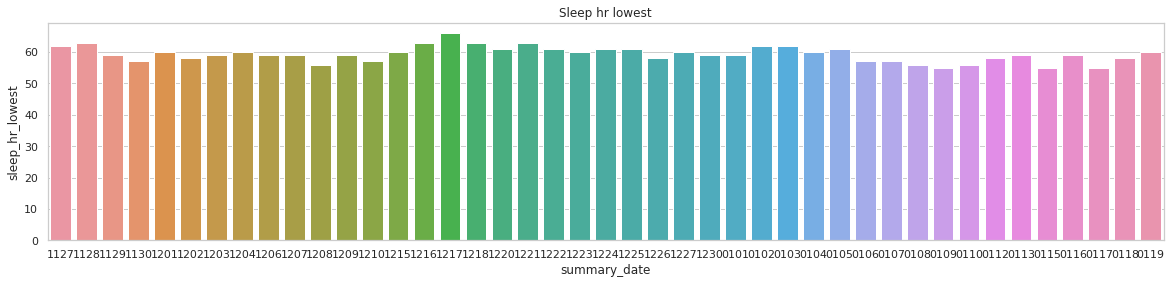

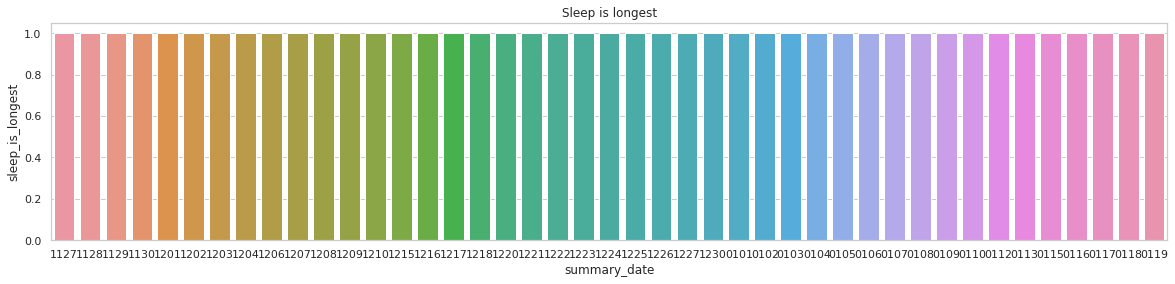

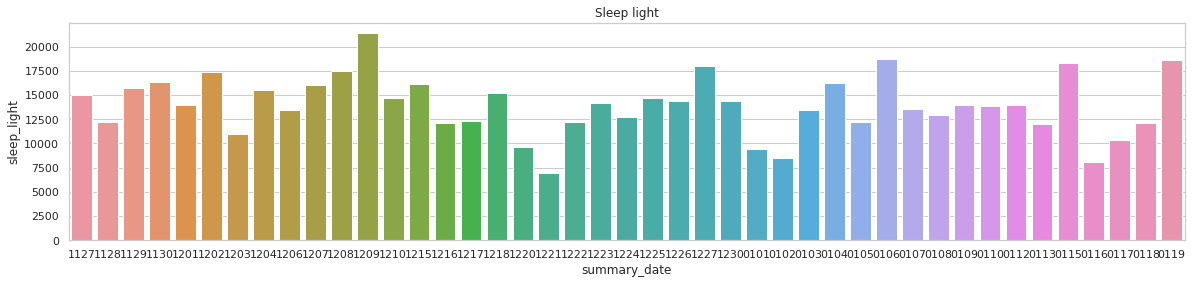

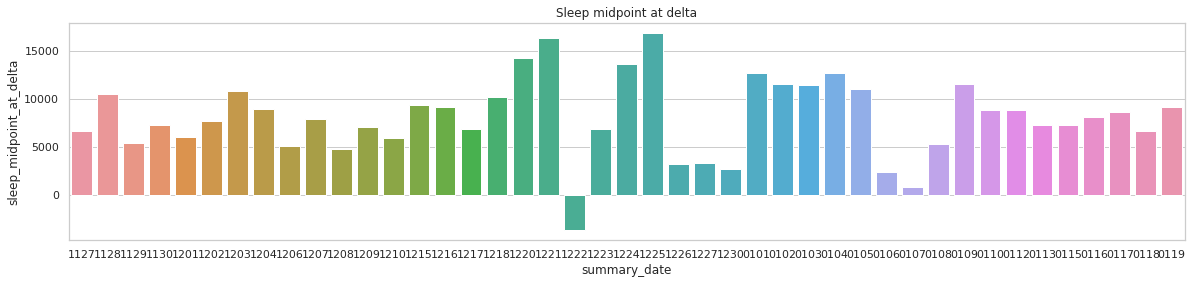

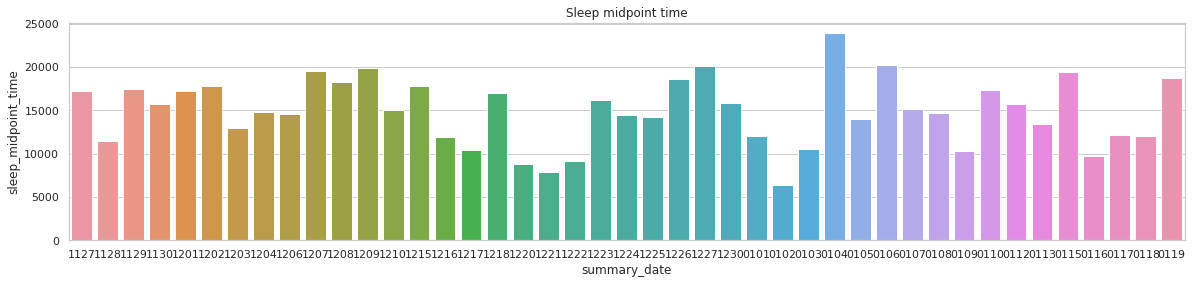

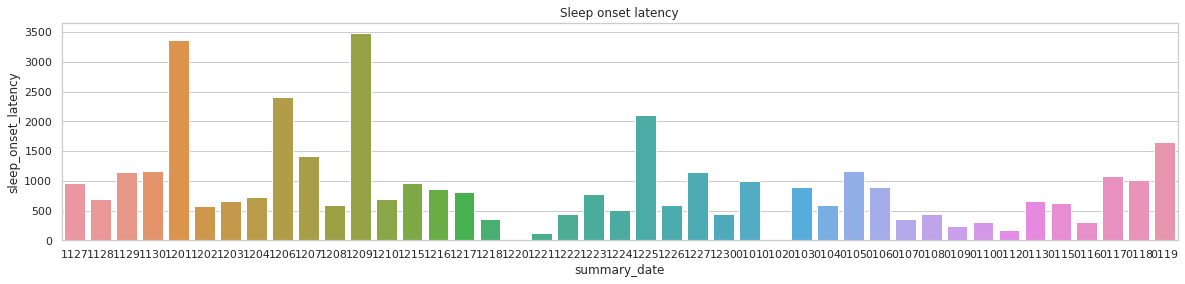

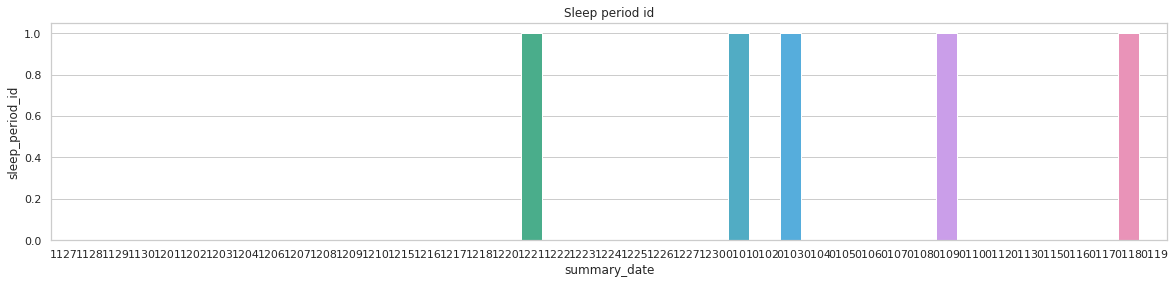

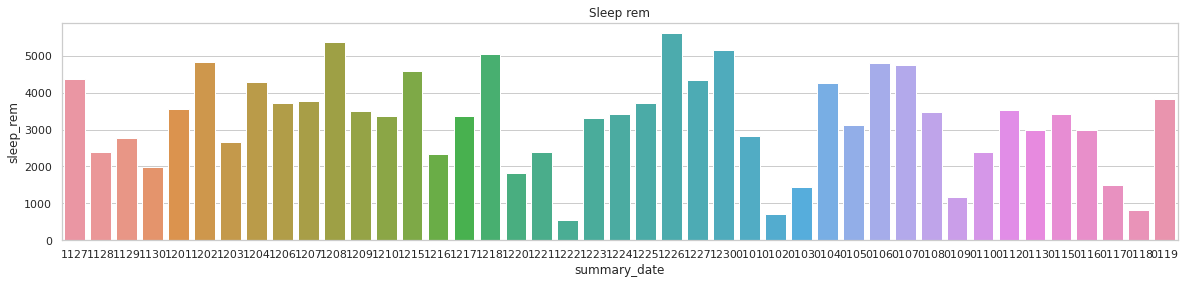

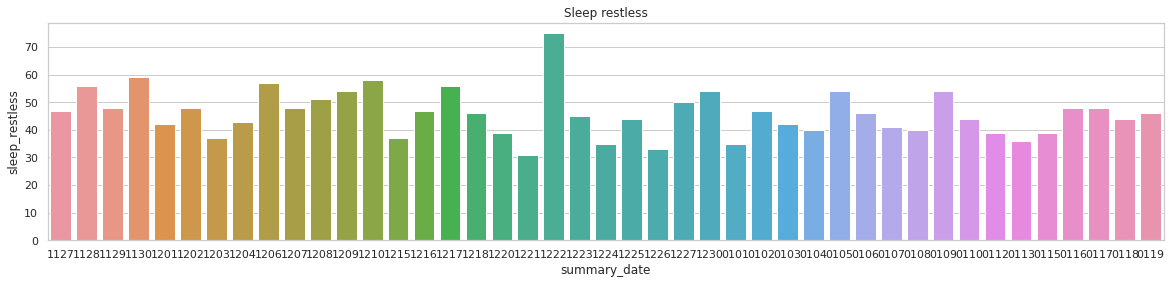

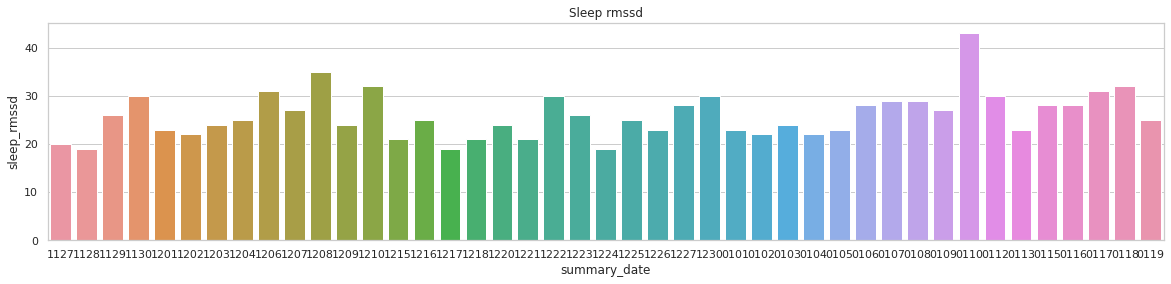

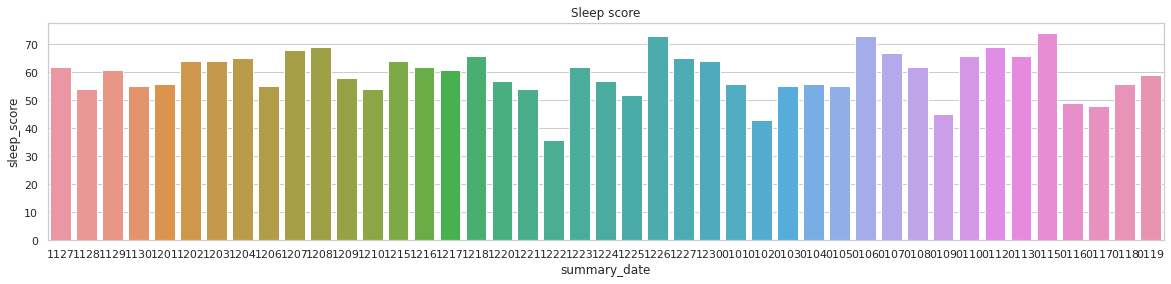

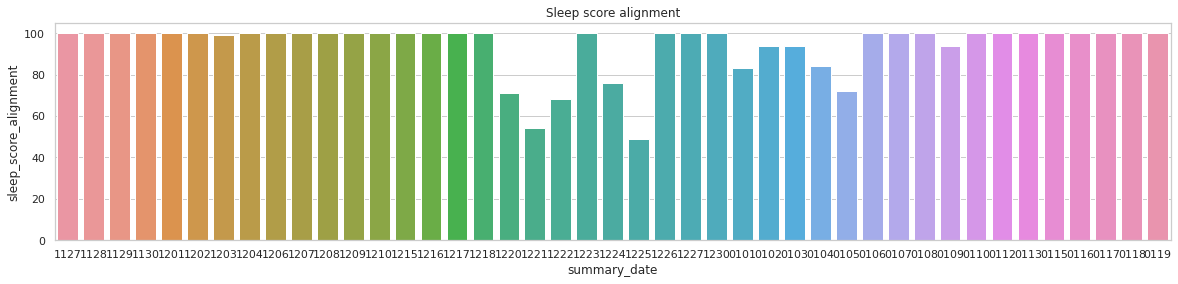

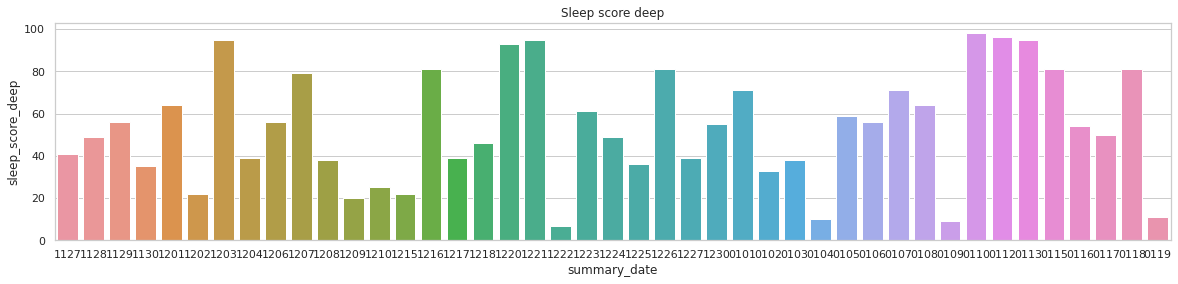

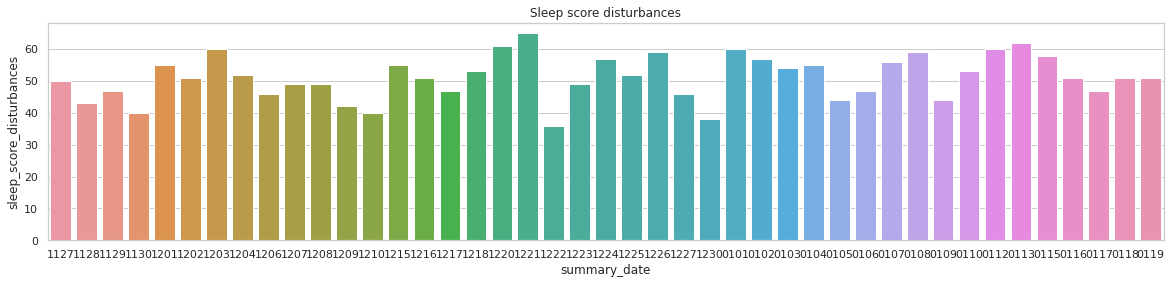

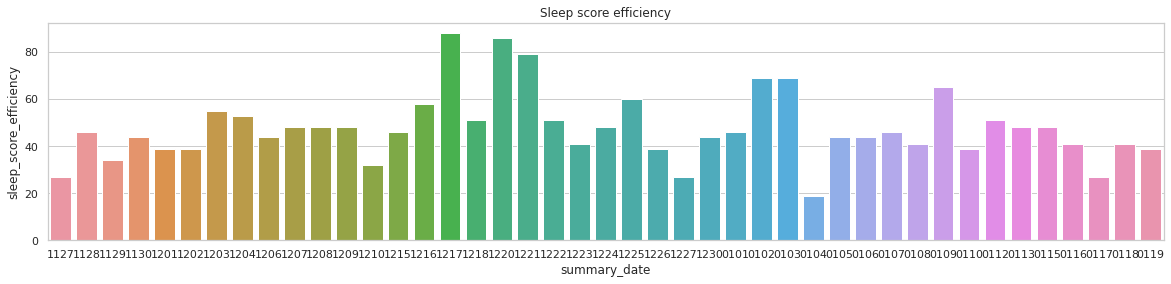

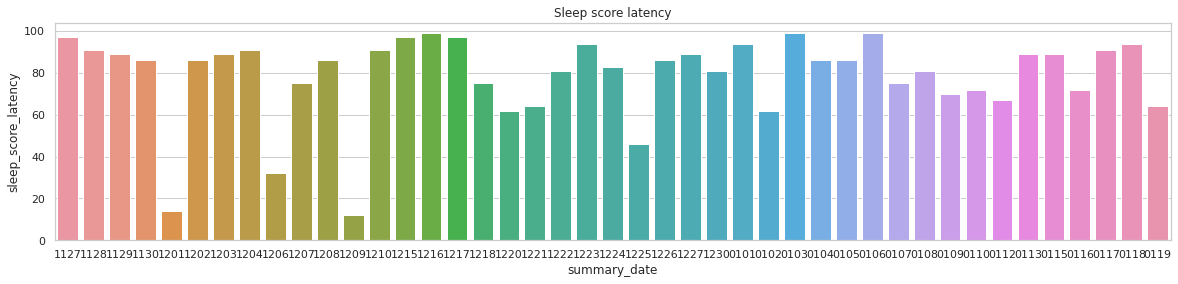

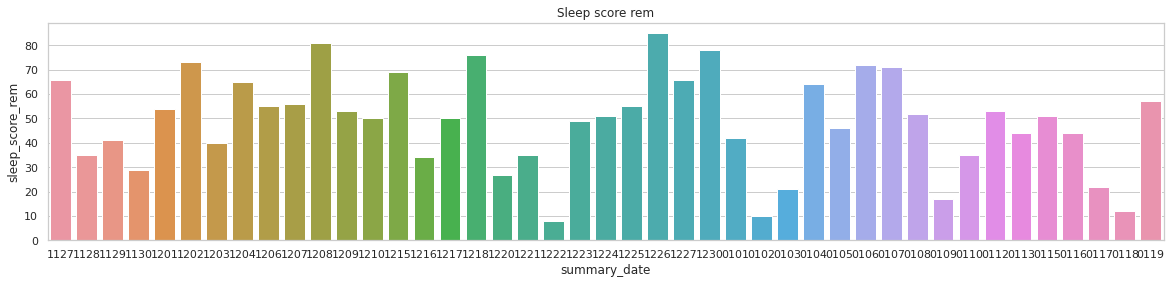

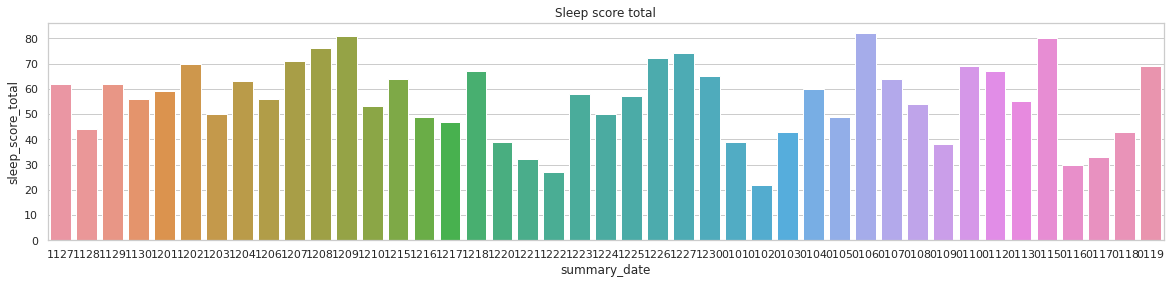

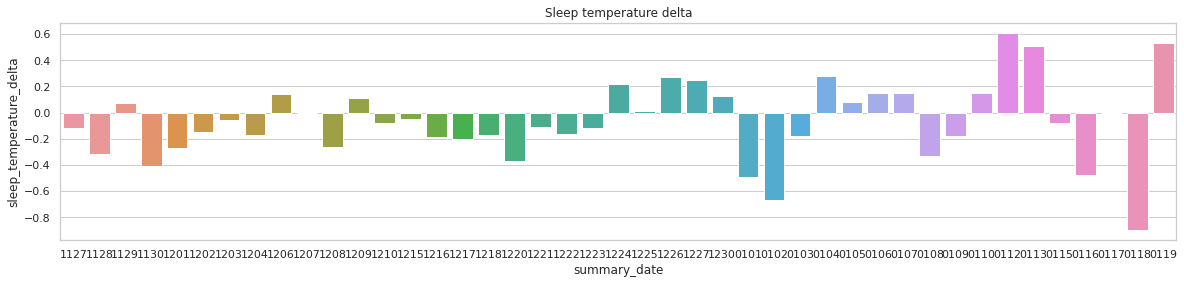

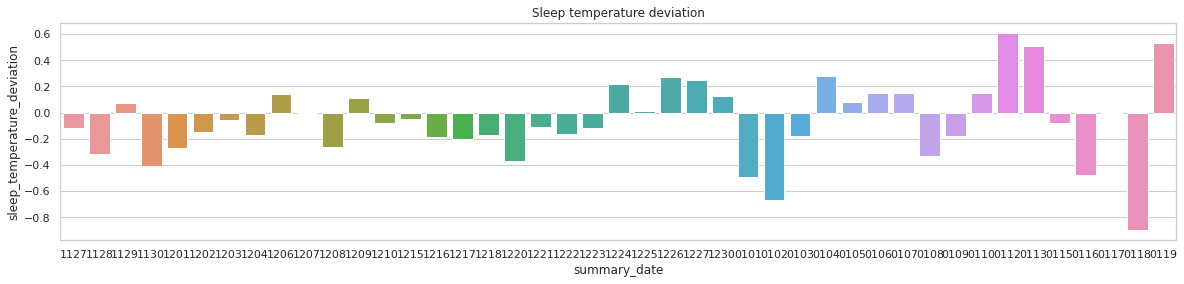

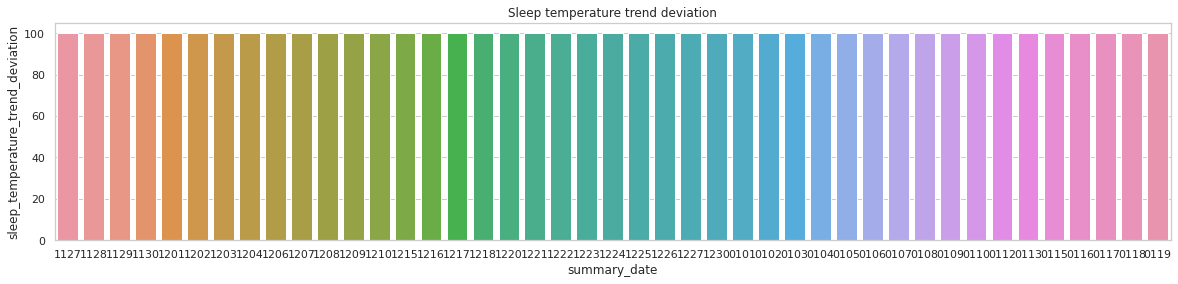

In [ ]:
for column in nia404.columns[1:]:
    try:
        plt.figure(figsize=(20,4))
        sns.barplot(data=nia404, x='summary_date', y=column)
        plt.title(column.replace('_',' ').capitalize())
        plt.show()
    except:
        pass

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9cd8e7e1-e402-43f1-832b-c2defdcc52b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>